In [1]:
# using python 3 to better handle unicode emojis
import re
import emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from bs4 import BeautifulSoup

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

%matplotlib inline

In [2]:
age_profiles = pd.read_json('assignment_package/age_profiles.json')

In [3]:
age_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 41 columns):
contributors_enabled                  2410 non-null bool
created_at                            2410 non-null datetime64[ns]
default_profile                       2410 non-null bool
default_profile_image                 2410 non-null bool
description                           2410 non-null object
entities                              2410 non-null object
favourites_count                      2410 non-null int64
follow_request_sent                   2410 non-null bool
followers_count                       2410 non-null int64
following                             2410 non-null bool
friends_count                         2410 non-null int64
geo_enabled                           2410 non-null bool
id                                    2410 non-null int64
id_str                                2410 non-null int64
is_translation_enabled                2410 non-null bool
is_translator      

In [4]:
age_profiles.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified
0,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{'description': {'urls': []}},7931,False,274,False,264,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{'retweeted_status': {'retweet_count': 452, 'c...",12230,Atlantic Time (Canada),None,-10800.0,False
1,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{'description': {'urls': []}},1141,False,481,False,527,True,490791079,490791079,False,False,en,1,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{'retweet_count': 0, 'created_at': 'Fri Sep 26...",14680,Hawaii,None,-36000.0,False
2,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{'description': {'urls': []}},174,False,878,False,953,False,264416315,264416315,False,False,en,2,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{'retweeted_status': {'retweet_count': 2614, '...",22857,Hawaii,None,-36000.0,False
3,False,2009-12-17 20:08:55,False,False,NEVER care about what a person says that doesn...,{'description': {'urls': []}},303,False,742,False,701,False,97515432,97515432,False,False,en,30,•Carolina South• 843•,. keeleesha,False,131516,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,NaN,http://pbs.twimg.com/profile_images/4939742059...,https://pbs.twimg.com/profile_images/493974205...,009999,FFFFFF,EFEFEF,333333,True,False,Keeleesha,"{'retweet_count': 0, 'entities': {'urls': [], ...",71654,Eastern Time (US & Canada),None,-14400.0,False
4,False,2011-03-24 21:14:53,False,False,these niggas some haters & i made myself so ea...,{'description': {'urls': []}},52,False,729,False,688,False,271608323,271608323,False,False,en,0,Seven•five•Seven,killakee :),False,0A0A0A,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/27160832...,http://pbs.twimg.com/profile_images/4627093362...,https://pbs.twimg.com/profile_images/462709336...,D62D0F,000000,000000,A3A3A3,True,False,KeeLashawn_,"{'retweet_count': 0, 'entities': {'urls': [{'e...",48452,Eastern Time (US & Canada),None,-14400.0,False


In [5]:
age_profiles.describe()

,favourites_count,followers_count,friends_count,id,id_str,listed_count,statuses_count,utc_offset
count,2410.000000,2410.000000,2410.000000,2.410000e+03,2.410000e+03,2410.000000,2410.000000,1697.000000
mean,1800.120332,944.855187,689.358921,6.918280e+08,6.918280e+08,5.470124,16982.506224,-12402.710666
std,3884.458445,7083.829476,4970.227333,7.953757e+08,7.953757e+08,34.984290,25033.534126,15420.244205
min,0.000000,0.000000,-69.000000,2.025381e+06,2.025381e+06,0.000000,0.000000,-39600.000000
25%,103.000000,160.000000,179.000000,1.592982e+08,1.592982e+08,0.000000,1960.250000,-18000.000000
50%,543.000000,348.000000,340.000000,3.508023e+08,3.508023e+08,1.000000,7408.500000,-18000.000000
75%,1949.500000,700.250000,628.000000,8.804243e+08,8.804243e+08,3.000000,21565.250000,-10800.000000
max,99169.000000,258937.000000,202293.000000,2.832494e+09,2.832494e+09,1292.000000,257590.000000,43200.000000


## Qu 1. 
Make   histograms   of   followers   count,   friends   count,   favorite   count,   and   status count,   all   of   which   are   in    age_profiles.csv .

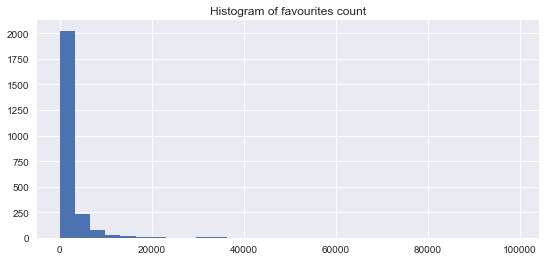

In [6]:
age_profiles.favourites_count.hist(bins=30, figsize=(9,4))
plt.title('Histogram of favourites count')

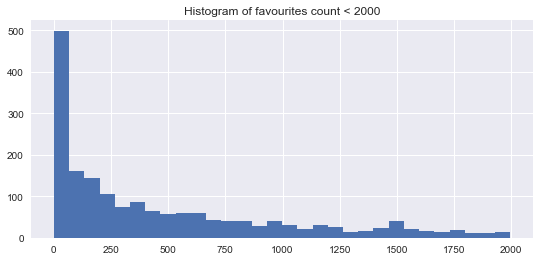

In [7]:
age_profiles[age_profiles['favourites_count']<2000]['favourites_count'].hist(bins=30, figsize=(9,4))
plt.title('Histogram of favourites count < 2000')

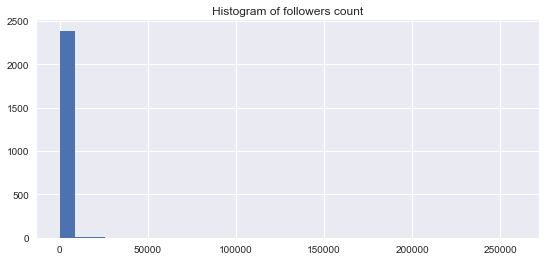

In [8]:
age_profiles.followers_count.hist(bins=30, figsize=(9,4))
plt.title('Histogram of followers count')

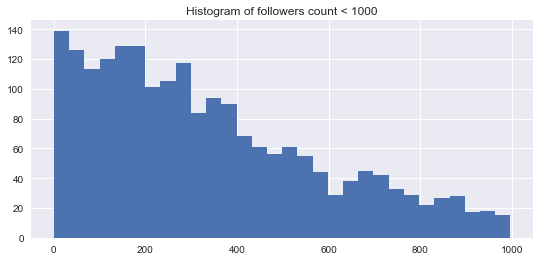

In [9]:
age_profiles[age_profiles['followers_count']<1000].followers_count.hist(bins=30, figsize=(9,4))
plt.title('Histogram of followers count < 1000')

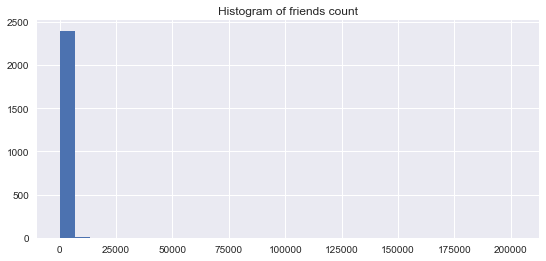

In [10]:
age_profiles.friends_count.hist(bins=30, figsize=(9,4))
plt.title('Histogram of friends count')

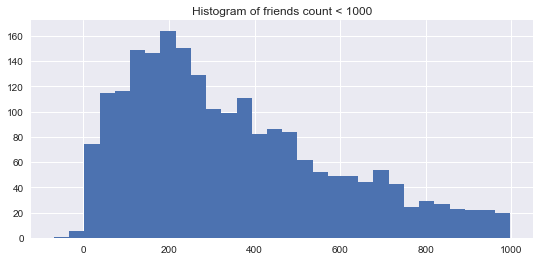

In [11]:
age_profiles[age_profiles['friends_count']<1000].friends_count.hist(bins=30, figsize=(9,4))
plt.title('Histogram of friends count < 1000')

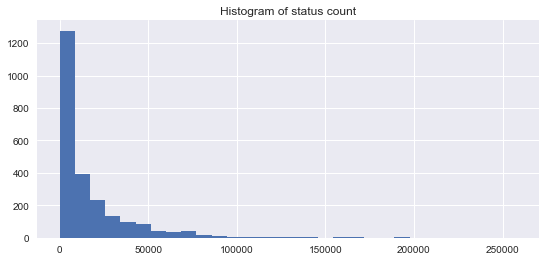

In [12]:
age_profiles.statuses_count.hist(bins=30, figsize=(9,4))
plt.title('Histogram of status count')

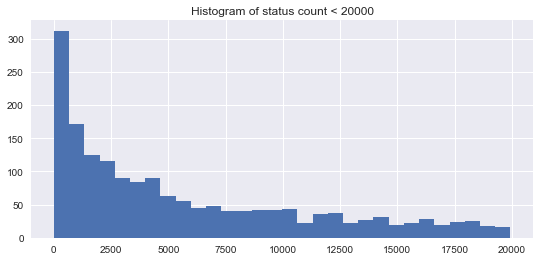

In [13]:
age_profiles[age_profiles['statuses_count']<20000]['statuses_count'].hist(bins=30, figsize=(9,4))
plt.title('Histogram of status count < 20000')

In [14]:
age_profiles[['favourites_count','followers_count', 'friends_count', 'statuses_count']].corr()

,favourites_count,followers_count,friends_count,statuses_count
favourites_count,1.000000,0.020342,0.002715,0.171091
followers_count,0.020342,1.000000,0.935946,0.077311
friends_count,0.002715,0.935946,1.000000,0.030932
statuses_count,0.171091,0.077311,0.030932,1.000000


## Insights: 
1. Friends and followers are strongly correlated, with a correlation of 0.9359.
2. Statuses_count and favourites_count are extremely weakly correlated, with a correlation of 0.1711.
3. statuses_count and followers_count/friends_count are extremely weakly correlated, with a correlation of 0.0773 and 0.0309.

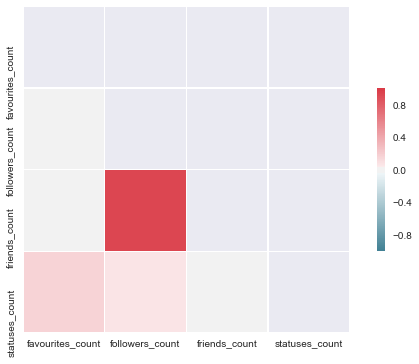

In [15]:
# plot correlation matrix: 
corr = age_profiles[['favourites_count','followers_count', 'friends_count', 'statuses_count']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Qu 2. 
Which   time   zone   has   the   highest   proportion   of   known   iOS   users   in age_profiles.csv ?      Which   time   zone   has   the   highest   proportion   of   Android   users?

In [16]:
ap_new = pd.concat([age_profiles,
                    pd.DataFrame(age_profiles['status'].apply(pd.Series) \
                    .rename(columns = lambda x: 'status_' + str(x)))], axis=1)

//anaconda/envs/capstone/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
//anaconda/envs/capstone/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


In [17]:
# define ios devices:
ios = ['Twitter for iPhone', 'Twitter for iPad', 'iOS', 'Twitter for Mac', 'Tweetbot for Mac',
       'TweetCaster for iOS', 'Tweetbot for iΟS', 'Osfoora for iOS', 'UberSocial for iPhone', 'OS X',
       'Instagram on iOS', '8 Ball Pool™ on iOS', 'Photos on iOS']

In [18]:
# define Android devices:
android = ['Twitter for Android', 'TweetCaster for Android', 'Plume for Android',
          'Twitter for Android Tablets', 'Twitter for  Android', 'UberSocial for Android',
          'Vine for Android', 'Fenix for Android', 'Echofon  Android']

In [19]:
ap_new['source_parsed'] = ap_new['status_source'].apply(lambda x: BeautifulSoup(str(x),'html.parser').text)

In [20]:
# create a new column as source_ios, in order to get proportion
ap_new['source_ios'] = (ap_new['source_parsed'].isin(ios)).astype(int)
ap_new['source_android'] = (ap_new['source_parsed'].isin(android)).astype(int)

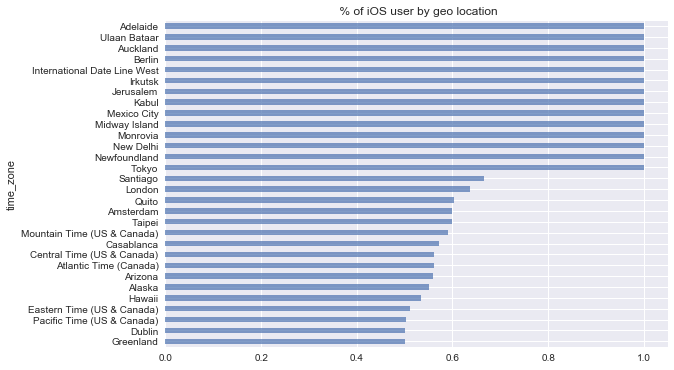

In [21]:
(ap_new['source_ios'].groupby(ap_new['time_zone']).sum() / 
ap_new['source_ios'].groupby(ap_new['time_zone']).count()).nlargest(30).sort_values() \
.plot(kind='barh', figsize=(9,6), alpha=.7)
plt.title(' % of iOS user by geo location')

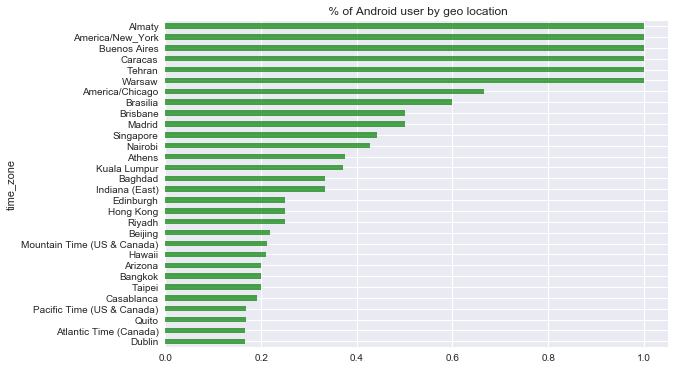

In [22]:
(ap_new['source_android'].groupby(ap_new['time_zone']).sum() / 
ap_new['source_android'].groupby(ap_new['time_zone']).count()).nlargest(30).sort_values() \
.plot(kind='barh', figsize=(9,6), color='g',alpha=.7)
plt.title(' % of Android user by geo location')

**Reason:** time_zone input is messy, "America/New_York" is actually the same with "Eastern Time", "America/New_York" only has 15 data points, and all of them are from Android devices. In order to get more accurate result, more data cleaning work need to be done.

## Qu 3.
Use   the   “mentions”   data   in    mentions.csv    to   come   up   with   a   list   of   Twitter   handles that   were   mentioned   by   more   than   one   user.

In [23]:
mentions = pd.read_csv('assignment_package/mentions.csv')

In [24]:
mentions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17695 entries, 0 to 17694
Data columns (total 3 columns):
ID                 17695 non-null int64
MentionedID        17695 non-null int64
MentionedHandle    17695 non-null object
dtypes: int64(2), object(1)
memory usage: 414.8+ KB


In [25]:
mentions.head()

,ID,MentionedID,MentionedHandle
0,612815277,798747864,AlenaBacalia
1,612815277,354590068,hfholden34
2,612815277,401111769,MarilynYousif
3,612815277,35581752,heeeeyerin
4,612815277,1591956090,DogeTheDog


In [26]:
# Twitter handles that have been mentioned by more than 1 user (By handle):
handles = mentions.groupby('MentionedHandle')['ID'].nunique() > 1
h1 = handles.reset_index()
h2 = h1[h1['ID']==True]

In [27]:
mentions['MentionedHandle'].nunique()

10746

In [28]:
agg_by_handle = h2['MentionedHandle']
agg_by_handle.to_csv('mentioned_more_than_one.csv', index=False)

## Question: 
Build a list of the top 20 handles(rank by greatest number of unique users mentioning a given handle).

In [29]:
mentions.groupby('MentionedHandle')['ID'].nunique().sort_values(ascending=False).nlargest(n=20)

MentionedHandle
girlposts          32
Sexualgif          30
SportsCenter       24
YouTube            22
BabyAnimalPics     20
SoDamnTrue         19
RelatableQuote     18
UberFacts          17
CuteEmergency      17
WORIDSTARHlPHOP    17
WorldStarFunny     16
FunnyPicsDepot     16
HornyFacts         15
FIirtationship     15
AboutVirgos        14
TweetLikeAGirI     14
wizkhalifa         14
FreddyAmazin       14
EmWatson           13
Drrake             12
Name: ID, dtype: int64

In [30]:
list(mentions.groupby('MentionedHandle')['ID'].nunique()
     .sort_values(ascending=False)
     .nlargest(n=20)
     .reset_index()['MentionedHandle'])

['girlposts',
 'Sexualgif',
 'SportsCenter',
 'YouTube',
 'BabyAnimalPics',
 'SoDamnTrue',
 'RelatableQuote',
 'UberFacts',
 'CuteEmergency',
 'WORIDSTARHlPHOP',
 'WorldStarFunny',
 'FunnyPicsDepot',
 'HornyFacts',
 'FIirtationship',
 'AboutVirgos',
 'TweetLikeAGirI',
 'wizkhalifa',
 'FreddyAmazin',
 'EmWatson',
 'Drrake']

## Question:
Which   actor/actress   in   this   top   20   list   starred   in   the   Harry   Potter   movies, and   how   many   unique   users   mentioned   this   star’s   Twitter   handle?

**Answer:** Emma Watson. 13 unique users have mentioned her in tweets in our data.

In [31]:
# One handle match with one ID, but one ID can match more than 1 handle
# people can change their handles, example: 
mentions[mentions['MentionedID'] == 2786430025]

,ID,MentionedID,MentionedHandle
159,154628162,2786430025,opnspirits
2800,1385365447,2786430025,sexpIoit
6348,173993294,2786430025,sexpIoit
13365,2500814748,2786430025,opnspirits


In [32]:
mentions[mentions['MentionedHandle'] == 'KinkyGifs']

,ID,MentionedID,MentionedHandle
16493,388611511,2577445704,KinkyGifs


In [33]:
# why KinkyGifs has only one record but was included in my 'r2'?
mentions[mentions['MentionedID'] == 2577445704]

,ID,MentionedID,MentionedHandle
934,448515595,2577445704,CraziestFreaks
935,448515595,2577445704,CraziestFreaks
1101,206444763,2577445704,CraziestFreaks
3241,403790784,2577445704,CraziestFreaks
4776,501025984,2577445704,CraziestFreaks
6846,2762236363,2577445704,CraziestFreaks
9119,386861037,2577445704,CraziestFreaks
9120,386861037,2577445704,CraziestFreaks
9121,386861037,2577445704,CraziestFreaks
9122,386861037,2577445704,CraziestFreaks


## Break   down   the   sample   by   age-decade   (age   10-20,   20-30,   etc).

In [34]:
# Use ages_train.csv to obtain age info
ages_train = pd.read_csv('assignment_package/ages_train.csv')

In [35]:
ages_train.head()

,ID,Age
0,23605717,21
1,781084760,19
2,102262916,21
3,413710015,21
4,584304916,90


In [36]:
ages_train.describe()

,ID,Age
count,1.711000e+03,1711.000000
mean,6.933661e+08,22.210403
std,8.066845e+08,7.220109
min,2.025381e+06,18.000000
25%,1.467558e+08,19.000000
50%,3.406691e+08,21.000000
75%,8.865310e+08,22.000000
max,2.832494e+09,111.000000


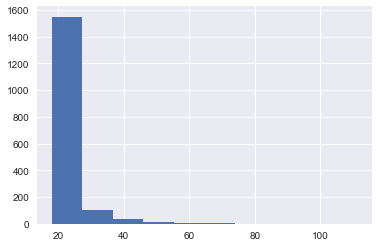

In [37]:
# max = 111 ?? check.
ages_train.Age.hist()

In [38]:
# some outliers...
ages_train[ages_train.Age > 80]

,ID,Age
4,584304916,90
452,394917207,94
988,75618870,87
1174,129959464,106
1316,2832494239,111


In [39]:
# remove outliers
ages_new = ages_train[ages_train['Age']<80]

In [40]:
# create a new column as age_decade:
bins = [17,25,35,45,55,120]
group_names = ['18-25','26-35','36-45','46-55','>55']
ages_new['age_decade'] = pd.cut(ages_new['Age'], bins, labels=group_names)

//anaconda/envs/capstone/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


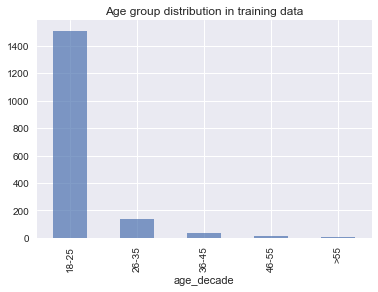

In [41]:
ages_new.groupby('age_decade')['ID'].count().plot(kind='bar', alpha=.7)
plt.title('Age group distribution in training data')

In [42]:
# absolute number
ages_new.groupby('age_decade')['ID'].count()

age_decade
18-25    1508
26-35     138
36-45      37
46-55      13
>55         9
Name: ID, dtype: int64

In [43]:
# relative proportion
ages_new.groupby('age_decade')['ID'].count()/len(ages_new)

age_decade
18-25    0.884457
26-35    0.080938
36-45    0.021701
46-55    0.007625
>55      0.005279
Name: ID, dtype: float64

## Try emoji extraction in python 3 (to better handle unicode):

In [44]:
def extract_emojis(s):
    return ''.join(c for c in str(s) if c in emoji.UNICODE_EMOJI)

In [45]:
# Load data
age_profiles = pd.read_json('assignment_package/age_profiles.json')
ages_train = pd.read_csv('assignment_package/ages_train.csv')

In [46]:
# Create a new age_profiles dataframe that extracts info from "status" column:
age_profiles_new = pd.concat([age_profiles, 
                              pd.DataFrame(age_profiles['status'].apply(pd.Series) \
                                           .rename(columns = lambda x: 'status_' + str(x)))], axis=1)

//anaconda/envs/capstone/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
//anaconda/envs/capstone/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


In [47]:
# Take a look at the new dataframe
# age_profiles_new.head()

In [48]:
# Create a new column 'status_emoji' that only has emojis:
age_profiles_new['status_emoji'] = age_profiles_new['status_text'].map(lambda x: extract_emojis(x))

In [49]:
# Create a new column as emoji count in each profile status text:
age_profiles_new['emoji_cnt'] = age_profiles_new['status_emoji'].map(lambda x: len(x))

# Join ages_train with age_profiles to get user age:


In [50]:
age_profiles_new.set_index('id', inplace=True)

In [51]:
ages_new.set_index('ID', inplace=True)

In [52]:
age_joined = age_profiles_new.join(ages_new, how='inner')

In [53]:
# Take a look at data
age_joined.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified,status_contributors,status_coordinates,status_created_at,status_entities,status_favorite_count,status_favorited,status_geo,status_id,status_id_str,status_in_reply_to_screen_name,status_in_reply_to_status_id,status_in_reply_to_status_id_str,status_in_reply_to_user_id,status_in_reply_to_user_id_str,status_lang,status_place,status_possibly_sensitive,status_retweet_count,status_retweeted,status_retweeted_status,status_source,status_text,status_truncated,status_0,status_emoji,emoji_cnt,Age,age_decade
612815277,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{'description': {'urls': []}},7931,False,274,False,264,True,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{'retweeted_status': {'retweet_count': 452, 'c...",12230,Atlantic Time (Canada),None,-10800.0,False,NaN,None,Fri Sep 26 16:49:37 +0000 2014,"{'urls': [], 'user_mentions': [{'id': 15919560...",0.0,False,None,5.155437e+17,515543724785684480,None,NaN,None,NaN,None,en,None,NaN,452.0,False,"{'retweet_count': 452, 'created_at': 'Fri Sep ...","<a href=""http://twitter.com/download/android"" ...",RT @DogeTheDog: Wow\n So friday\n ...,False,NaN,,0,21,18-25
490791079,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{'description': {'urls': []}},1141,False,481,False,527,True,490791079,False,False,en,1,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{'retweet_count': 0, 'created_at': 'Fri Sep 26...",14680,Hawaii,None,-36000.0,False,NaN,None,Fri Sep 26 17:42:07 +0000 2014,"{'urls': [], 'user_mentions': [], 'symbols': [...",0.0,False,None,5.155569e+17,515556938512609280,None,NaN,None,NaN,None,en,None,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Damn I gotta wait to next week to get the IPho...,False,NaN,😒,1,18,18-25
264416315,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{'description': {'urls': []}},174,False,878,False,953,False,264416315,False,False,en,2,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{'retweeted_status': {'retweet_count': 2614, '...",22857,Hawaii,None,-36000.0,False,NaN,None,Fri Sep 26 02:57:32 +0000 2014,"{'urls': [], 'media': [{'media_url': 'http://p...",0.0,False,None,5.153343e+17,515334328113307649,None,NaN,None,NaN,None,en,None,False,2614.0,False,"{'retweet_count': 2614, 'entities': {'urls': [...","<a href=""http://twitter.com/download/android"" ...",RT @ImNeverChillin: How your girl look at you ...,False,NaN,,0,18,18-25
9751

## **Which   age   group   uses   the   most   emojis   in   their   profile   status?

**Define 'most emojis'** as total number of emojis used in profile status.

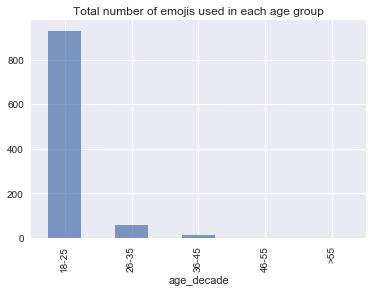

In [54]:
# Absolute number of emojis: 
age_joined.groupby(['age_decade'])['emoji_cnt'].sum().plot(kind='bar', alpha=.7)
plt.title('Total number of emojis used in each age group')

**How about proportion?** Which age groups has the highest proportion of users that are using emojis in profile status?

In [55]:
# Proportion of using emojis:
age_joined.groupby(['age_decade'])['emoji_cnt'].sum() / age_joined.groupby(['age_decade'])['status_text'].count()

age_decade
18-25    0.633697
26-35    0.411765
36-45    0.361111
46-55    0.000000
>55      0.125000
dtype: float64

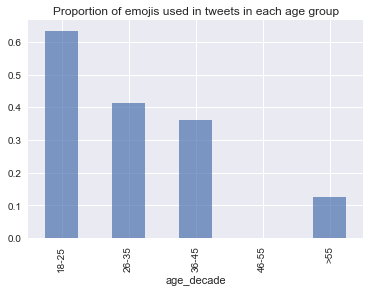

In [56]:
(age_joined.groupby(['age_decade'])['emoji_cnt'].sum() / age_joined.groupby(['age_decade'])['status_text'].count()).plot(kind='bar', alpha=.7)
plt.title('Proportion of emojis used in tweets in each age group')

## Which is the most common emoji?

Define "most common emoji" as the emoji used for the largest number of times.

In [57]:
# Stack all status_emoji together into one list, find the most common one:
all_emojis_lst = list(filter(None, age_profiles_new.status_emoji.tolist()))

In [58]:
# Get a string of all emojis:
all_emojis = ''.join(x for x in all_emojis_lst)

In [59]:
Counter(all_emojis).most_common(5)

[('😂', 164), ('😍', 63), ('😩', 53), ('😭', 50), ('🎉', 48)]

**Conclusion:** 
- 😂 is the most common emoji, with 164 appearances. 